# Calculate initial WSU data properties

The goal of this notebook is to calculate the properties of the initial WSU data based on the original data base with Early and Later WSU.

Record of changes:
* Original code (8/16/2024)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, vstack, QTable
import astropy.units as u
import pandas as pd
import pickle
from importlib import reload
import wsu_plots
import wsu_db
import re

## Read in data files

In [2]:
result_c7_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle7_20231212_without_band3_nbin3_npol4.ecsv')
result_c8_mous = QTable.read('data/wsu_datarates_mit_per_mous_cycle8_20231212_without_band3_nbin3_npol4.ecsv')

In [3]:
len(result_c7_mous)

2712

In [4]:
len(result_c8_mous)

2480

In [5]:
wsu_all = vstack([result_c7_mous,result_c8_mous])

In [6]:
len(wsu_all)

5192

In [7]:
wsu_all['weights_all'] = wsu_all['time_tot']/np.sum(wsu_all['time_tot'])

In [8]:
wsu_all.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

In [9]:
np.median(wsu_all['wsu_visrate_early_stepped2_typical'])

<Quantity 25.0116375 Gvis / h>

In [10]:
np.average(wsu_all['blc_visrate_typical'],weights=wsu_all['weights_all'])*1e3

<Quantity 9408.88784384 Gvis / h>

In [11]:
np.average(wsu_all['blc_visrate_typical'],weights=wsu_all['weights_all'])/0.001

<Quantity 9408.88784384 Gvis / h>

In [12]:
np.average(wsu_all['wsu_sysperf_early_stepped2_typical_aprojonly'],weights=wsu_all['weights_all'])

<Quantity 0.09329012>

In [13]:
np.max(wsu_all['wsu_sysperf_early_stepped2_typical_aprojonly'])

3.7398558897699994

In [14]:
np.average(wsu_all['blc_sysperf_typical_aprojonly'],weights=wsu_all['weights_all'])/0.001

<Quantity 3.35394744>

In [15]:
np.max(wsu_all['blc_sysperf_typical_aprojonly'])/0.001

73.85688502857141

## calculating the initial WSU properties

In [16]:
reload(wsu_db)
wsu_all_initial_goal = wsu_db.create_initial_wsu_db(wsu_all)

In [17]:
wsu_all_initial_goal.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

In [18]:
reload(wsu_db)
wsu_all_initial_goal_wprop = wsu_db.add_initial_wsu_properties(wsu_all_initial_goal)

In [19]:
wsu_all_initial_goal_wprop.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

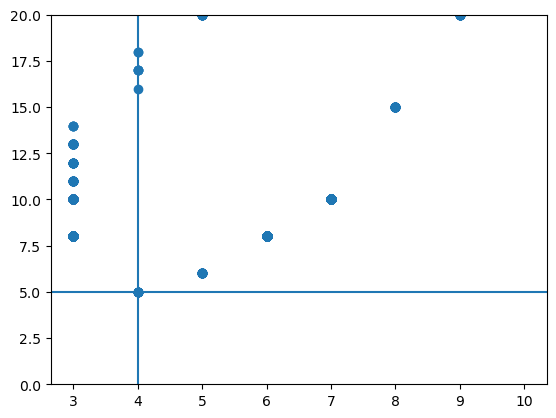

In [20]:
plt.scatter(wsu_all_initial_goal_wprop['band'],wsu_all_initial_goal_wprop['wsu_chanavg_stepped2_initial'])
plt.ylim(0,20)
plt.axhline(5) #chan_avg=5
plt.axvline(4) #band 4

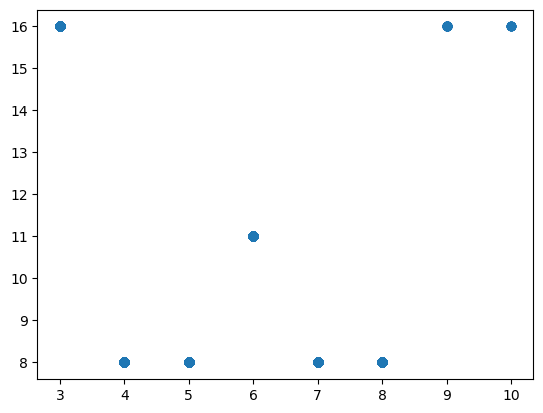

In [21]:
plt.scatter(wsu_all_initial_goal_wprop['band'],wsu_all_initial_goal_wprop['wsu_bandwidth_initial'])


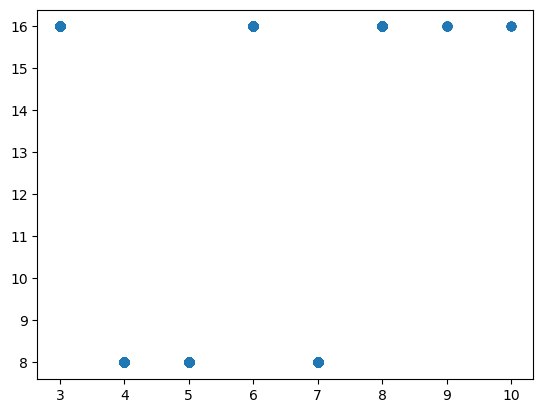

In [22]:
plt.scatter(wsu_all_initial_goal_wprop['band'],wsu_all_initial_goal_wprop['wsu_bandwidth_early'])

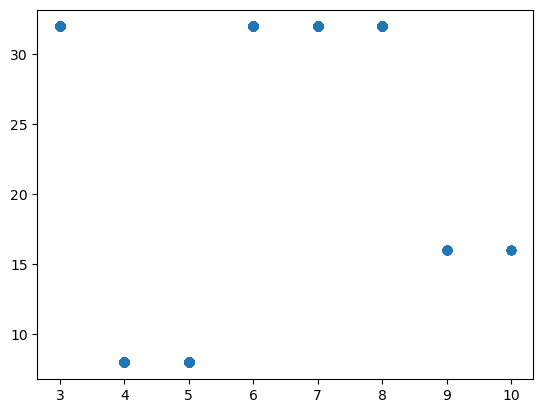

In [23]:
plt.scatter(wsu_all_initial_goal_wprop['band'],wsu_all_initial_goal_wprop['wsu_bandwidth_goal'])

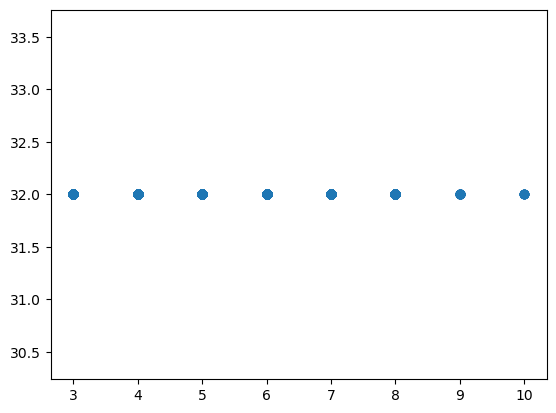

In [24]:
plt.scatter(wsu_all_initial_goal_wprop['band'],wsu_all_initial_goal_wprop['wsu_bandwidth_later_4x'])

In [25]:
band_list = [3,4,5,6,7,8,9,10]
for band in band_list:
    idx = wsu_all_initial_goal_wprop['band'] == band
    print(band, np.min(wsu_all_initial_goal_wprop['wsu_chanavg_stepped2_initial'][idx]))

3 8.0
4 5.0
5 6.0
6 8.0
7 10.0
8 15.0
9 20.0
10 32.0


In [26]:
band_list = [3,4,5,6,7,8,9,10]
for band in band_list:
    idx = wsu_all_initial_goal_wprop['band'] == band
    print(band, np.min(wsu_all_initial_goal_wprop['wsu_chanavg_stepped2'][idx]))

3 2.0
4 5.0
5 2.0
6 2.0
7 2.0
8 4.0
9 20.0
10 32.0


In [27]:
idx = (wsu_all_initial_goal_wprop['band'] == 3) & (wsu_all_initial_goal_wprop['wsu_chanavg_stepped2'] <= 2)
wsu_all_initial_goal_wprop[idx]['proposal_id','band','wsu_chanavg_stepped2','wsu_freq','wsu_velres_stepped2','wsu_datarate_early_stepped2_typical']


proposal_id,band,wsu_chanavg_stepped2,wsu_freq,wsu_velres_stepped2,wsu_datarate_early_stepped2_typical
,,,GHz,km / s,Gbyte / s
str14,float64,float64,float64,float64,float64
2019.1.01184.S,3.0,2.0,113.96744014566454,0.071023762187291,1.740739
2019.1.01184.S,3.0,2.0,104.27675175454381,0.07762417058265617,1.740739
2019.1.01184.S,3.0,2.0,113.9807615555354,0.0710154613421856,1.740739
2019.1.01184.S,3.0,2.0,104.28893681642722,0.07761510101735929,1.740739
2021.1.00116.S,3.0,2.0,104.24027490072169,0.07765133364919742,1.740739
2021.1.00116.S,3.0,2.0,113.980769715002,0.07101545625844835,1.740739
2021.1.00116.S,3.0,2.0,104.2261906917967,0.0776618267661305,1.740739
2021.1.00116.S,3.0,2.0,113.96556309277597,0.07102493197362253,1.740739


Okay it looks like what happened here is that these are the ones with velocities slightly less than 0.1 km/s, which we allow but with smaller chanavg as long as it doesn't exceed the data rate.

In [28]:
band_list = [3,4,5,6,7,8,9,10]
for band in band_list:
    idx = wsu_all_initial_goal_wprop['band'] == band
    print(band, np.max(wsu_all_initial_goal_wprop['wsu_datarate_initial_stepped2_initial'][idx]))

3 0.18247945833333334 Gbyte / s
4 0.14598455208333333 Gbyte / s
5 0.12165461458333333 Gbyte / s
6 0.13685959375 Gbyte / s
7 0.0729898125 Gbyte / s
8 0.048659875 Gbyte / s
9 0.0729898125 Gbyte / s
10 0.0456149375 Gbyte / s


In [29]:
band_list = [3,4,5,6,7,8,9,10]
for band in band_list:
    idx = wsu_all_initial_goal_wprop['band'] == band
    print(band, np.max(wsu_all_initial_goal_wprop['wsu_datarate_early_stepped2_typical'][idx]))

3 1.740739 Gbyte / s
4 0.34814075 Gbyte / s
5 0.8703695 Gbyte / s
6 1.740739 Gbyte / s
7 0.8703695 Gbyte / s
8 0.8703695 Gbyte / s
9 0.1740645 Gbyte / s
10 0.1087815 Gbyte / s


In [33]:
idx = wsu_all_initial_goal_wprop['array'] == '12m'
np.max(wsu_all_initial_goal_wprop['nant_initial'][idx])

43.0

## save data base

In [36]:
wsu_all_initial_goal_wprop.write('data/wsu_datarates_mit_per_mous_initial_goal_20240828.ecsv',overwrite=True)

## add in band 1 and 2 estimates

This is relevant to initial and goal wsu. also needed to get the mechanism in for the statistics tables.

In [35]:
reload(wsu_db)
wsu_db.generate_db_realizations(wsu_all_initial_goal_wprop, outDir='data/sample_initial_goal',
                                filename='wsu_datarates_mit_per_mous_band12_20231212_initial_goal',
                                frac_12m=0.1, frac_7m=0.06, n=10)

-------------
data/sample_initial_goal/wsu_datarates_mit_per_mous_band12_20231212_initial_goal_000.ecsv
---
Total number of MOUSes: 5192
Total number of MOUSes meeting the criteria: 2818
Number of MOUSes removed: 328
New number of MOUSes: 4864


Total time: 5206.931093333333 h
Time to be replaced: 520.6931093333333 h
Time replaced: 524.6152799999996 h
---
---
Total number of MOUSes: 4864
Total number of MOUSes meeting the criteria: 1493
Number of MOUSes removed: 119
New number of MOUSes: 4745


Total time: 3953.507506666667 h
Time to be replaced: 237.2104504 h
Time replaced: 240.97891999999996 h
---
-------------
data/sample_initial_goal/wsu_datarates_mit_per_mous_band12_20231212_initial_goal_001.ecsv
---
Total number of MOUSes: 5192
Total number of MOUSes meeting the criteria: 2818
Number of MOUSes removed: 347
New number of MOUSes: 4845


Total time: 5206.931093333333 h
Time to be replaced: 520.6931093333333 h
Time replaced: 521.76488 h
---
---
Total number of MOUSes: 4845
Total numb

In [37]:
test3 = QTable.read('data/sample_initial_goal/wsu_datarates_mit_per_mous_band12_20231212_initial_goal_000.ecsv')

In [38]:
test3.columns

<TableColumns names=('mous','proposal_id','schedblock_name','array','science_keyword','scientific_category','scientific_category_proposal','nant_typical','nant_array','nant_all','band','ntarget','s_fov','s_resolution','mosaic','imsize','pb','cell','blc_npol','blc_nspw','blc_specwidth','blc_freq','blc_velres','blc_nchan_agg','blc_nchan_max','blc_bandwidth_max','blc_bandwidth_agg','wsu_freq','wsu_npol','wsu_bandwidth_early','wsu_bandwidth_later_2x','wsu_bandwidth_later_4x','wsu_bandwidth_spw','wsu_nspw_early','wsu_nspw_later_2x','wsu_nspw_later_4x','wsu_specwidth_finest','wsu_chanavg_finest','wsu_velres_finest','wsu_specwidth_stepped','wsu_chanavg_stepped','wsu_velres_stepped','wsu_specwidth_stepped2','wsu_chanavg_stepped2','wsu_velres_stepped2','wsu_tint','wsu_nchan_spw_finest','wsu_nchan_spw_stepped','wsu_nchan_spw_stepped2','wsu_nchan_agg_finest_early','wsu_nchan_agg_finest_later_2x','wsu_nchan_agg_finest_later_4x','wsu_nchan_agg_stepped_early','wsu_nchan_agg_stepped_later_2x','wsu_nc

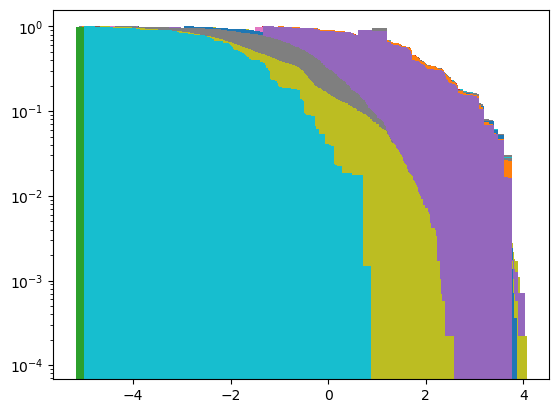

In [39]:
reload(wsu_db)
myresults = wsu_db.calculate_dist(outDir='data/sample_initial_goal',
                                  filename='wsu_datarates_mit_per_mous_band12_20231212_initial_goal',
                                   nbins=500,
                                    quantity_list = ['wsu_nspw_initial','wsu_nspw_early','wsu_nspw_goal','wsu_nspw_later_4x',
                                                     'wsu_cubesize_initial_stepped2','wsu_cubesize_stepped2',    
                                    'wsu_productsize_initial_stepped2',                                  
                                    'wsu_datarate_initial_stepped2_initial', 
                                    'wsu_visrate_initial_stepped2_initial',                                  
                                    'wsu_datavol_initial_stepped2_initial_target_tot',
                                    'wsu_datavol_initial_stepped2_initial_cal',
                                    'wsu_datavol_initial_stepped2_initial_total',
                                    'wsu_productsize_early_stepped2',                                  
                                    'wsu_datarate_early_stepped2_typical', # typical number of antennas
                                    'wsu_visrate_early_stepped2_typical',                                  
                                    'wsu_datavol_early_stepped2_typical_target_tot',
                                    'wsu_datavol_early_stepped2_typical_cal',
                                    'wsu_datavol_early_stepped2_typical_total',
                                    'wsu_datarate_goal_stepped2_typical', # typical number of antennas
                                    'wsu_visrate_goal_stepped2_typical',                                  
                                    'wsu_datavol_goal_stepped2_typical_target_tot',
                                    'wsu_datavol_goal_stepped2_typical_cal',
                                    'wsu_datavol_goal_stepped2_typical_total',
                                    'wsu_productsize_goal_stepped2',                                  
                                    'wsu_datarate_later_4x_stepped2_typical',
                                    'wsu_visrate_later_4x_stepped2_typical',                                  
                                    'wsu_datavol_later_4x_stepped2_typical_target_tot',
                                    'wsu_datavol_later_4x_stepped2_typical_cal',
                                    'wsu_datavol_later_4x_stepped2_typical_total',
                                    'wsu_productsize_later_4x_stepped2',                                  
                                    'blc_sysperf_typical_allgrid',
                                    'wsu_sysperf_early_stepped2_typical_allgrid',
                                    'wsu_sysperf_later_2x_stepped2_typical_allgrid',
                                    'wsu_sysperf_later_4x_stepped2_typical_allgrid',
                                    'blc_sysperf_typical_aprojonly',
                                    'wsu_sysperf_early_stepped2_typical_aprojonly',
                                    'wsu_sysperf_later_2x_stepped2_typical_aprojonly',
                                    'wsu_sysperf_later_4x_stepped2_typical_aprojonly',
                                    'wsu_sysperf_goal_stepped2_typical_aprojonly',
                                    'wsu_sysperf_initial_stepped2_initial_aprojonly'])

In [40]:
# save results
import os
pickle.dump(myresults,open(os.path.join('data/sample_initial_goal',
                                        'wsu_datarates_mit_per_mous_band12_20231212_initial_goal_agg.pkl'),'wb'))

In [41]:
reload(wsu_db)
mystats = wsu_db.calc_wsu_stats_allsamples(outDir='data/sample_initial_goal',
                                           filename='wsu_datarates_mit_per_mous_band12_20231212_initial_goal',
                                            quantity_list=['blc_nspw',
                                               'blc_cubesize',
                                               'blc_productsize',
                                               'blc_datarate_typical',
                                               'blc_visrate_typical',
                                               'blc_datavol_typical_target_tot',
                                               'blc_datavol_typical_cal',
                                               'blc_datavol_typical_total',  
                                               'wsu_nchan_agg_stepped2_initial',
                                               'wsu_nchan_agg_stepped2_early',
                                               'wsu_nchan_agg_stepped2_goal',
                                               'wsu_nchan_agg_stepped2_later_4x',
                                               'wsu_nspw_initial','wsu_nspw_early',
                                               'wsu_nspw_goal','wsu_nspw_later_4x',
                                               'wsu_cubesize_initial_stepped2',
                                               'wsu_cubesize_stepped2',
                                               'wsu_productsize_initial_stepped2',                                  
                                               'wsu_datarate_initial_stepped2_initial', # typical number of antennas
                                               'wsu_visrate_initial_stepped2_initial',                                  
                                               'wsu_datavol_initial_stepped2_initial_target_tot',
                                               'wsu_datavol_initial_stepped2_initial_cal',
                                               'wsu_datavol_initial_stepped2_initial_total',
                                               'wsu_productsize_early_stepped2',                                  
                                               'wsu_datarate_early_stepped2_typical', # typical number of antennas
                                               'wsu_visrate_early_stepped2_typical',                                  
                                               'wsu_datavol_early_stepped2_typical_target_tot',
                                               'wsu_datavol_early_stepped2_typical_cal',
                                               'wsu_datavol_early_stepped2_typical_total',
                                               'wsu_productsize_goal_stepped2',                                  
                                               'wsu_datarate_goal_stepped2_typical',
                                               'wsu_visrate_goal_stepped2_typical',
                                               'wsu_datavol_goal_stepped2_typical_target_tot',
                                               'wsu_datavol_goal_stepped2_typical_cal',
                                               'wsu_datavol_goal_stepped2_typical_total',
                                               'wsu_productsize_later_4x_stepped2',                                  
                                               'wsu_datarate_later_4x_stepped2_typical',
                                               'wsu_visrate_later_4x_stepped2_typical',
                                               'wsu_datavol_later_4x_stepped2_typical_target_tot',
                                               'wsu_datavol_later_4x_stepped2_typical_cal',
                                               'wsu_datavol_later_4x_stepped2_typical_total',
                                               'wsu_productsize_later_4x_stepped2',                                  
                                               'blc_sysperf_typical_aprojonly',
                                               'wsu_sysperf_initial_stepped2_initial_aprojonly',
                                               'wsu_sysperf_early_stepped2_typical_aprojonly',
                                               'wsu_sysperf_goal_stepped2_typical_aprojonly',
                                               'wsu_sysperf_later_4x_stepped2_typical_aprojonly'])

/Users/akepley/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


In [42]:
# save results
import os
pickle.dump(mystats,open(os.path.join('data/sample_initial_goal',
                                        'wsu_datarates_mit_per_mous_band12_20231212_initial_goal'+"_stats.pkl"),'wb'))

# Make Tables

In [58]:
reload(wsu_db)
wsu_db.make_wsu_stats_table_newstats_datarate(mystats,add_initial_goal=True,
                                              fileout='tables/wsu_datarate_summary_initial_goal.tex')

In [59]:
reload(wsu_db)
wsu_db.make_wsu_stats_table_newstats_datavol(mystats,add_initial_goal=True,
                                             fileout='tables/wsu_datavol_summary_initial_goal.tex')

In [60]:
reload(wsu_db)
wsu_db.make_wsu_stats_table_newstats_sysperf(mystats,
                                             add_initial_goal=True,
                                             fileout='tables/wsu_sysperf_summary_initial_goal.tex')

## plots

In [61]:
band1_band2_agg = pickle.load(open('data/sample_initial_goal/wsu_datarates_mit_per_mous_band12_20231212_initial_goal_agg.pkl','rb'))

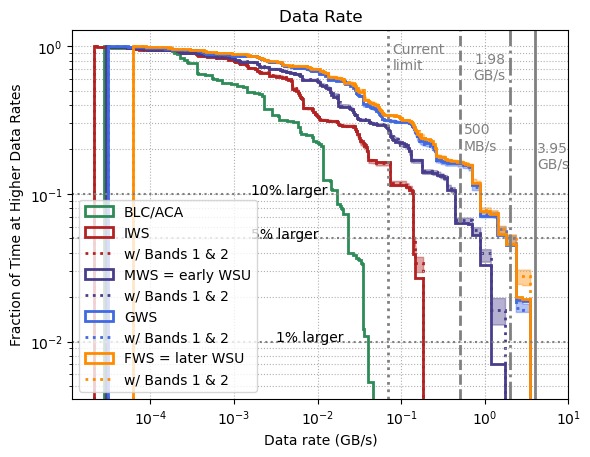

In [64]:
reload(wsu_plots)
wsu_plots.plot_datarate_comparison(wsu_all_initial_goal_wprop,
                                  add_initial=True,
                                  add_goal=True, 
                                  old_labels=False, 
                                  add_tech_limits=True,
                                  band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                  figname='plots_update/datarate_distribution_initial_goal.png')

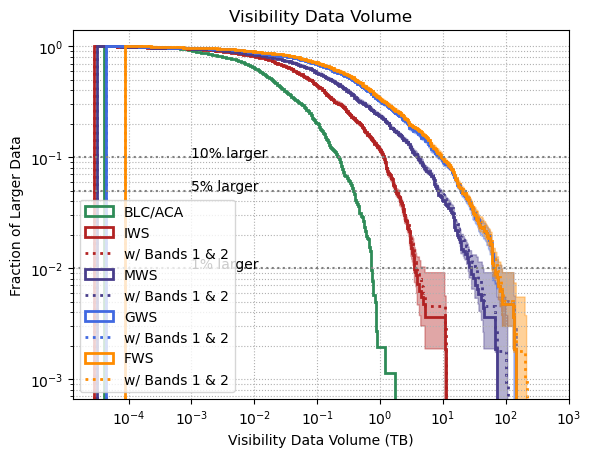

In [65]:
reload(wsu_plots)
wsu_plots.plot_datavol_comparison(wsu_all_initial_goal_wprop,datatype='total',
                                  plot_title='Visibility Data Volume',
                                  add_initial=True,add_goal=True, old_labels=False,
                                   band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                   figname='plots_update/datavol_distribution_initial_goal.png')

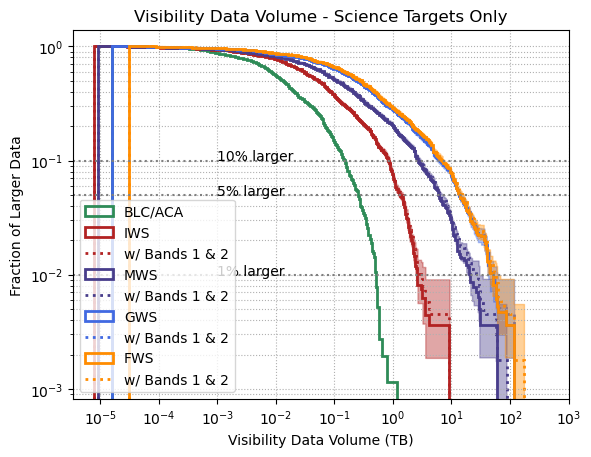

In [66]:
reload(wsu_plots)
wsu_plots.plot_datavol_comparison(wsu_all_initial_goal_wprop,datatype='target_tot',
                                  plot_title='Visibility Data Volume - Science Targets Only',
                                  add_initial=True,add_goal=True, old_labels=False,
                                 band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                 figname='plots_update/datavol_distribution_target_tot_initial_goal.png')

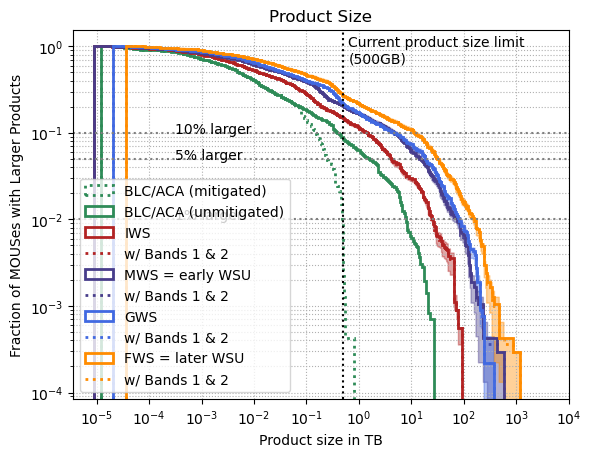

In [67]:
reload(wsu_plots)
wsu_plots.plot_productsize_comparison(wsu_all_initial_goal_wprop,
                                  plot_title='Product Size',
                                  add_initial=True,add_goal=True, old_labels=False,
                                     band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                     figname='plots_update/productsize_distribution.png')

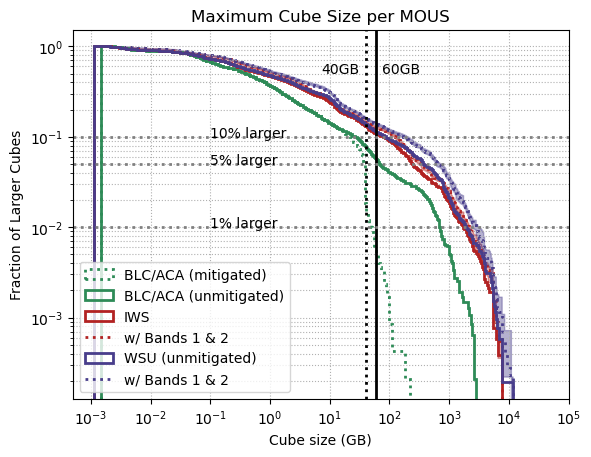

In [68]:
reload(wsu_plots)
wsu_plots.plot_cubesize_comparison(wsu_all_initial_goal_wprop, plot_title="Maximum Cube Size per MOUS",add_initial=True,
                                  band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                  figname='plots_update/cubesize_distribution_initial_goal.png')

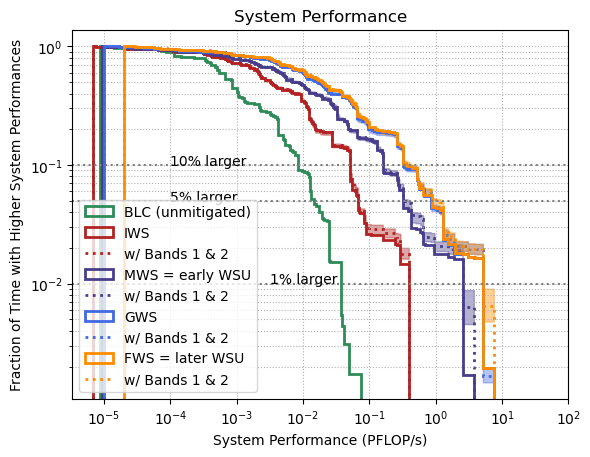

In [69]:
reload(wsu_plots)
wsu_plots.plot_soc_result_cumulative(wsu_all_initial_goal_wprop,
                                     plot_title='System Performance',label='aprojonly',
                                     add_initial=True,add_goal=True, old_labels=False,
                                        band1_band2_estimate=band1_band2_agg['hist_cumulative'],
                                    pltname='plots_update/sysperf_distribution_aprojonly_initial_goal.png')

maximum ratio
756.4062748828828
median ratio
2.457893734101096


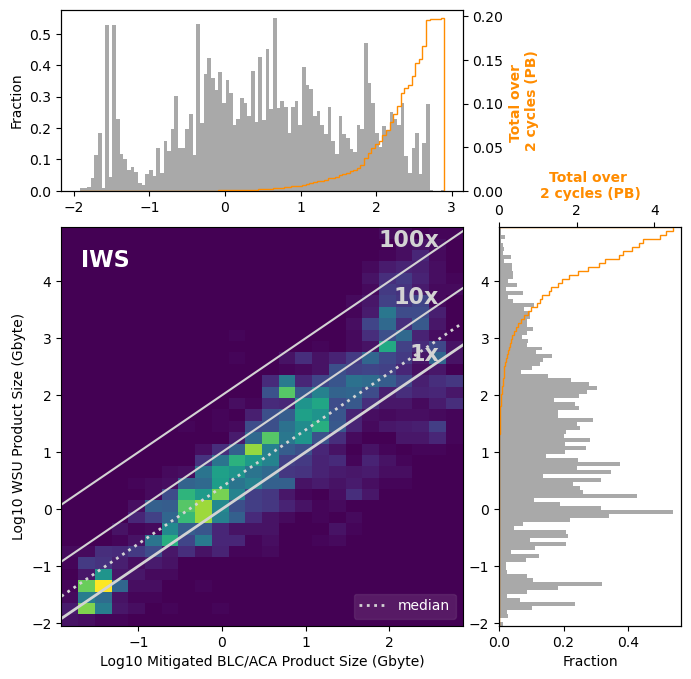

In [70]:
reload(wsu_plots)
wsu_plots.productsize_comparison_hist_plot(wsu_all_initial_goal_wprop,stage='initial',plot_title = 'IWS',
                                  pltname='plots_update/productsize_comparison_initial.png')

maximum ratio
2244.6927620641563
median ratio
6.268784132231405


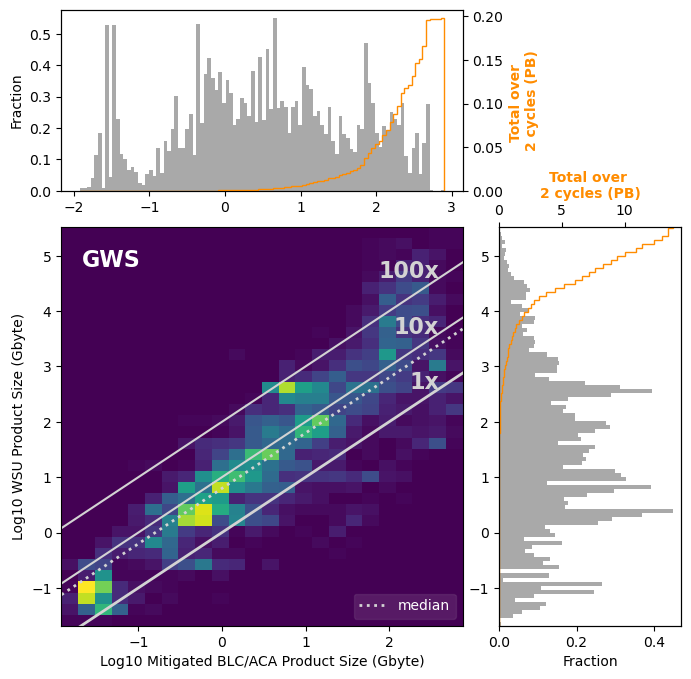

In [71]:
reload(wsu_plots)
wsu_plots.productsize_comparison_hist_plot(wsu_all_initial_goal_wprop,stage='goal',plot_title = 'GWS',
                                          pltname='plots_update/productsize_comparison_goal.png')

Median Ratio
3.39583740234375
Max Ratio
61.50018977732793


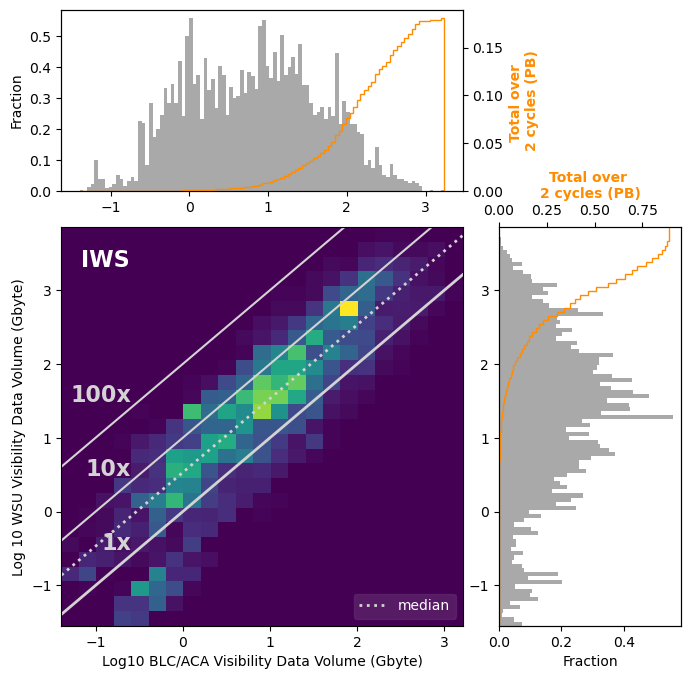

In [72]:
reload(wsu_plots)
wsu_plots.visibility_size_comparison_hist_plot(wsu_all_initial_goal_wprop,stage='initial',plot_title = 'IWS',
                                                  pltname='plots_update/datavol_comparison_initial.png')

Median Ratio
16.513603940217394
Max Ratio
694.40625


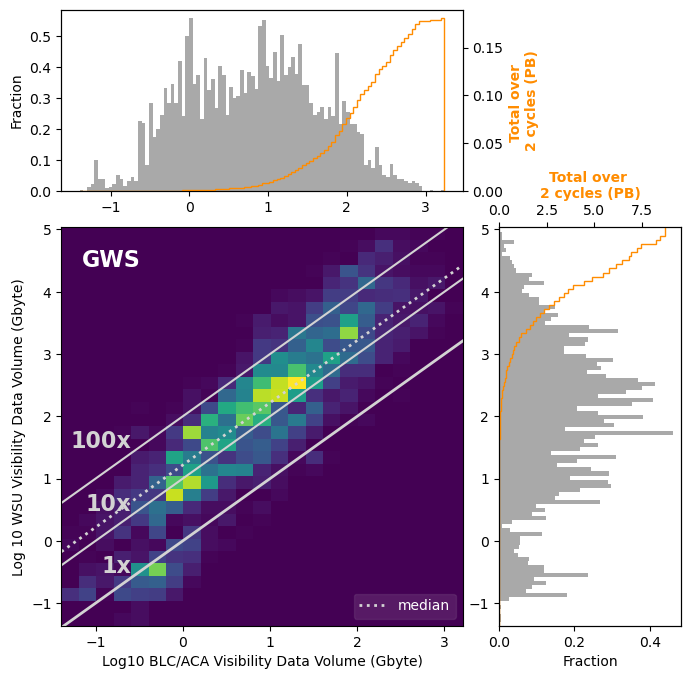

In [73]:
reload(wsu_plots)
wsu_plots.visibility_size_comparison_hist_plot(wsu_all_initial_goal_wprop,stage='goal',plot_title = 'GWS',
                                              pltname='plots_update/datavol_comparison_goal.png')

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23.]


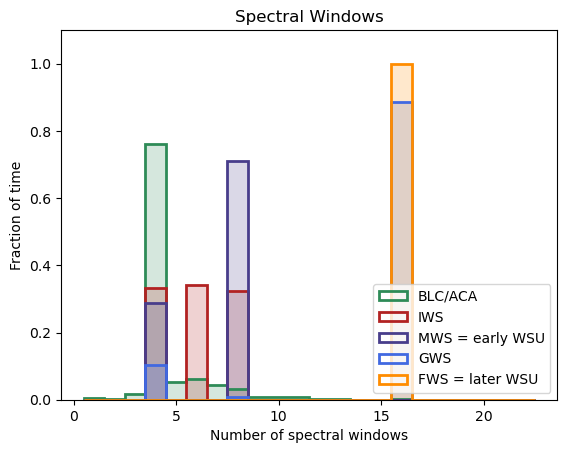

In [74]:
reload(wsu_plots)
wsu_plots.plot_spw_hist_all(wsu_all_initial_goal_wprop,bin_min=1,bin_max=23,nbin=22,
                           title='Spectral Windows',
                           add_initial=True, add_goal=True, old_labels=False,
                           pltname='plots_update/nspw_all_initial_goal.png')

In [75]:
np.ceil(11.5)

12.0

In [76]:
50**2/36**2

1.9290123456790123

In [77]:
0.218/0.033

6.6060606060606055

In [78]:
0.470/0.218

2.1559633027522933

In [79]:
0.104/0.015

6.933333333333334